# Lesson 8: Object Detection

- In the classroom, the libraries are already installed for you.
- If you would like to run this code on your own machine, you can install the following:

```
    !pip install transformers
    !pip install gradio
    !pip install timm
    !pip install inflect
    !pip install phonemizer
```

**Note:**  `py-espeak-ng` is only available Linux operating systems.

To run locally in a Linux machine, follow these commands:
```
    sudo apt-get update
    sudo apt-get install espeak-ng
    pip install py-espeak-ng
```

### Build the `object-detection` pipeline using 🤗 Transformers Library

- This model was release with the paper [End-to-End Object Detection with Transformers](https://arxiv.org/abs/2005.12872) from Carion et al. (2020)

In [22]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer
!sudo apt-get install espeak

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
espeak is already the newest version (1.48.15+dfsg-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [23]:
!pip install matplotlib-venn

In [24]:
!pip install helper
from helper import *

In [25]:
from transformers import pipeline

- Here is some code that suppresses warning messages.

In [26]:
from transformers.utils import logging
logging.set_verbosity_error()


In [27]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

Info about [facebook/detr-resnet-50](https://huggingface.co/facebook/detr-resnet-50)

Explore more of the [Hugging Face Hub for more object detection models](https://huggingface.co/models?pipeline_tag=object-detection&sort=trending)

### Use the Pipeline

In [28]:
from PIL import Image

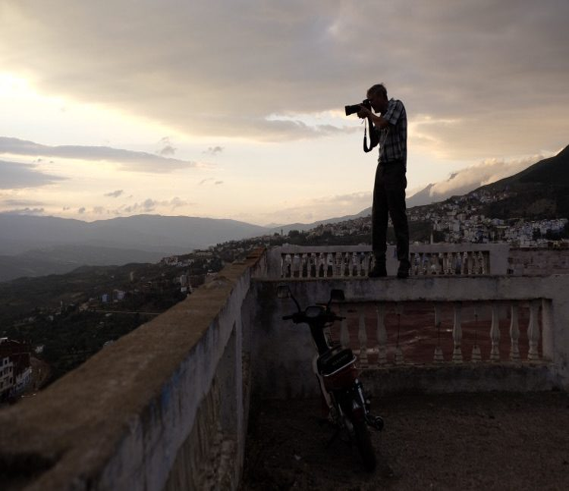

In [29]:
raw_image = Image.open('/huggingface_friends.jpeg')
raw_image.resize((569, 491))

In [30]:
pipeline_output = od_pipe(raw_image)

In [31]:
pipeline_output

[{'score': 0.9200812578201294,
  'label': 'tie',
  'box': {'xmin': 483, 'ymin': 120, 'xmax': 494, 'ymax': 156}},
 {'score': 0.9472774863243103,
  'label': 'motorcycle',
  'box': {'xmin': 367, 'ymin': 293, 'xmax': 502, 'ymax': 481}},
 {'score': 0.9995121955871582,
  'label': 'person',
  'box': {'xmin': 457, 'ymin': 82, 'xmax': 543, 'ymax': 282}}]

- Return the results from the pipeline using the helper function `render_results_in_image`.

In [32]:
!pip install evaluate
from evaluate import load

In [33]:
!pip install image_utils

In [38]:
processed_image = render_results_in_image(
    raw_image,
    pipeline_output)

NameError: name 'render_results_in_image' is not defined

In [ ]:
processed_image

### Using `Gradio` as a Simple Interface

- Use [Gradio](https://www.gradio.app) to create a demo for the object detection app.
- The demo makes it look friendly and easy to use.
- You can share the demo with your friends and colleagues as well.

In [ ]:
import os
import gradio as gr

In [ ]:
def get_pipeline_prediction(pil_image):

    pipeline_output = od_pipe(pil_image)

    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [ ]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image",
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

- `share=True` will provide an online link to access to the demo

In [ ]:
demo.launch(share=True, server_port=int(os.environ['PORT1']))

In [ ]:
demo.close()

### Close the app
- Remember to call `.close()` on the Gradio app when you're done using it.

### Make an AI Powered Audio Assistant

- Combine the object detector with a text-to-speech model that will help dictate what is inside the image.

- Inspect the output of the object detection pipeline.

In [ ]:
pipeline_output

In [ ]:
od_pipe

In [ ]:
raw_image = Image.open('huggingface_friends.jpg')
raw_image.resize((284, 245))

In [ ]:
from helper import summarize_predictions_natural_language

In [ ]:
text = summarize_predictions_natural_language(pipeline_output)

In [ ]:
text

### Generate Audio Narration of an Image

In [ ]:
tts_pipe = pipeline("text-to-speech",
                    model="./models/kakao-enterprise/vits-ljs")

More info about [kakao-enterprise/vits-ljs](https://huggingface.co/kakao-enterprise/vits-ljs).

In [ ]:
narrated_text = tts_pipe(text)

### Play the Generated Audio

In [ ]:
from IPython.display import Audio as IPythonAudio

In [ ]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

### Try it yourself!
- Try these models with other images!